### SETUP CSV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import zscore, norm, t
df = pd.read_csv("banana.csv")
df = df.drop(columns=[df.columns[0]])
df

,Acidity,Weight,Length,Appearance,Tannin,Ripeness,Sweetness,Country_of_Origin,Firmness,Grade,Price
0,5.977114,149.825704,49.249144,3.770162,8.092385,6.916558,6.763285,Costa Rica,0.370053,A,20075.252141
1,8.625523,150.759254,50.048300,6.007516,7.400025,6.706338,6.481902,Costa Rica,0.560635,A,20016.601326
2,8.813012,148.780694,49.865871,5.166949,6.861433,6.607327,5.702631,Costa Rica,0.373475,C,20123.529719
3,7.496444,152.329626,49.676489,5.451806,7.342269,6.482970,6.265227,Colombia,0.490814,A,20055.353632
4,6.885109,150.412228,50.526268,3.872441,7.630643,6.064423,6.856929,Colombia,0.826858,A,20003.643981
...,...,...,...,...,...,...,...,...,...,...,...
1995,6.642403,151.039757,50.238865,4.867772,9.091904,7.985697,6.804132,Costa Rica,0.500176,A,19921.061841
1996,7.653993,151.431401,49.132623,5.734657,8.231696,6.854072,6.806902,Colombia,0.706189,B,19875.326652
1997,8.591312,150.018217,47.992948,3.827522,8.015240,6.696851,6.129531,Costa Rica,0.864229,B,19998.199999
1998,7.854793,149.431460,50.440215,3.479959,8.493746,6.286329,6.463142,Ecuador,0.658963,B,20029.421471


### SOAL NO 1

In [4]:
# Deskripsi statistik numerik
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'country' dan 'origin'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
            Acidity       Weight       Length   Appearance       Tannin  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      8.014830   150.011549    49.950434     4.965595     7.965435   
std       1.105781     1.194980     0.894599     1.014863     1.217188   
min       4.456118   146.060922    46.418052     1.775864     4.291274   
25%       7.259942   149.227116    49.346508     4.258210     7.167241   
50%       8.005347   150.022865    49.923682     4.979534     8.022448   
75%       8.758361   150.827613    50.572027     5.653875     8.792184   
max      11.418636   154.070370    53.065151     8.233968    12.416177   
mode      4.456118   146.060922    46.418052     1.775864     4.291274   
skew      0.056793    -0.084767     0.026878    -0.035389    -0.066152   
kurt     -0.147134     0.024967    -0.053550    -0.002189     0.066349   
var       1.222752     1.427977     0.800307     1.029946     1.481546   
range   

/var/folders/rf/505x6jx91s3c_9bcpbpv2bw40000gn/T/ipykernel_19125/2215186902.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)


### SOAL NO 2

In [5]:
print("Pada file banana.csv, terdapat data yang rusak atau kotor pada kolom 'Country_of_Origin' dan kolom 'Price'.") 
print("Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.")
print("Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1 dan 0.")
print("Sehingga data tersebut perlu dibuang terlebih dahulu")
print()
print("Pada file banana.csv, terdapat data outlier pada beberapa kolom")
print("Data outlier adalah data observasi yang berbeda jauh dari observasi lain dalam dataset")
print("Biasanya data outlier dapat ditentukan melalui beberapa metode dan kemudian menghapus atau mengganti data outlier tersebut")
print("Beberapa metode yang dapat digunakan adalah metode IQR, Standar Deviasi, Z-Score")
print("Metode yang dipilih adalah metode IQR karena IQR tidak dipengaruhi oleh outlier dan cocok untuk data yang tidak terdistribusi normal")
print("Metode ini menentukan data outlier dengan mencari data observasi yang berada di bawah batas lower bound dan di atas upper bound")
print("Lower bound = Q1 - 1.5 * IQR dan Upper bound = Q3 + 1.5 * IQR")
print("Setelah menemukan semua data outlier pada kolom, kami memutuskan untuk menghapus data tersebut")

Pada file banana.csv, terdapat data yang rusak atau kotor pada kolom 'Country_of_Origin' dan kolom 'Price'.
Data rusak pada kolom 'Country_of_Origin' adalah adanya negara yang namanya undefined.
Data rusak pada kolom 'Price' adalah adanya price yang nilainya -1 dan 0.
Sehingga data tersebut perlu dibuang terlebih dahulu

Pada file banana.csv, terdapat data outlier pada beberapa kolom
Data outlier adalah data observasi yang berbeda jauh dari observasi lain dalam dataset
Biasanya data outlier dapat ditentukan melalui beberapa metode dan kemudian menghapus atau mengganti data outlier tersebut
Beberapa metode yang dapat digunakan adalah metode IQR, Standar Deviasi, Z-Score
Metode yang dipilih adalah metode IQR karena IQR tidak dipengaruhi oleh outlier dan cocok untuk data yang tidak terdistribusi normal
Metode ini menentukan data outlier dengan mencari data observasi yang berada di bawah batas lower bound dan di atas upper bound
Lower bound = Q1 - 1.5 * IQR dan Upper bound = Q3 + 1.5 * IQR

In [6]:
# Menghapus baris untuk data yang kotor
df = df[df['Country_of_Origin'] != 'undefined']
df = df[df['Price'] != -1]
df = df[df['Price'] != 0]

# Deskripsi statistik numerik baru
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'country' dan 'origin'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
            Acidity       Weight       Length   Appearance       Tannin  \
count  1995.000000  1995.000000  1995.000000  1995.000000  1995.000000   
mean      8.015371   150.008617    49.950168     4.966225     7.963444   
std       1.106512     1.193042     0.895059     1.014972     1.216492   
min       4.456118   146.060922    46.418052     1.775864     4.291274   
25%       7.259560   149.223667    49.342866     4.258955     7.165561   
50%       8.006613   150.021147    49.925503     4.978815     8.021046   
75%       8.758572   150.827168    50.572286     5.654247     8.787140   
max      11.418636   154.070370    53.065151     8.233968    12.416177   
mode      4.456118   146.060922    46.418052     1.775864     4.291274   
skew      0.055204    -0.091124     0.025963    -0.035155    -0.066684   
kurt     -0.148515     0.020174    -0.055313    -0.000539     0.069230   
var       1.224369     1.423349     0.801130     1.030168     1.479854   
range   

/var/folders/rf/505x6jx91s3c_9bcpbpv2bw40000gn/T/ipykernel_19125/3622908.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)


In [7]:
# Mengidentifikasi kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Dictionary untuk menyimpan data outliers
outliers_dict = {}

# Melakukan iterasi pada setiap kolom numerik untuk menghitung IQR dan menentukan outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outliers_dict[col] = df[filter]

outlier_indices = []

# Loop through the dictionary to get all indices of outliers
for col, data in outliers_dict.items():
    outlier_indices.extend(data.index.tolist())

# Convert to set to remove duplicates, if any
outlier_indices = list(set(outlier_indices))
# Drop the outliers in place
df.drop(index=outlier_indices, inplace=True)
# Display the DataFrame to confirm removal
df

# Metode lain
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# outliers_iqr = {}
# outliers_std = {}
# outliers_zscore = {}

# # Iterating over each numeric column to determine outliers
# for col in numeric_cols:
#     # IQR Method
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     filter_iqr = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
#     outliers_iqr[col] = df[filter_iqr]
    
#     # Standard Deviation Method
#     mean = df[col].mean()
#     std_dev = df[col].std()
#     filter_std = (df[col] < (mean - 3 * std_dev)) | (df[col] > (mean + 3 * std_dev))
#     outliers_std[col] = df[filter_std]
    
#     # Z-Score Method
#     df['z_score'] = zscore(df[col])
#     filter_zscore = (df['z_score'] < -3) | (df['z_score'] > 3)
#     outliers_zscore[col] = df[filter_zscore]

# # Printing results to compare
# print("Outliers using IQR:")
# print(outliers_iqr)
# print("\nOutliers using Standard Deviation:")
# print(outliers_std)
# print("\nOutliers using Z-Score:")
# print(outliers_zscore)
deskripsi_numerik = df.describe()

# Menghitung IQR
IQR = deskripsi_numerik.loc['75%'] - deskripsi_numerik.loc['25%']

# Menambahkan modus, skewness, dan kurtosis untuk data numerik
modus = df.select_dtypes(include=[np.number]).mode().iloc[0]
skewness = df.select_dtypes(include=[np.number]).skew()
kurtosis = df.select_dtypes(include=[np.number]).kurt()
variansi = df.select_dtypes(include=[np.number]).var()
range_value = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()

# Menggabungkan semua statistik ke dalam satu DataFrame untuk data numerik
statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)
statistik_lengkap.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skew', 'kurt', 'var', 'range', 'IQR']

# Menghitung jumlah nilai unik dan proporsi untuk kolom 'country' dan 'origin'
unik_country = df['Country_of_Origin'].nunique()
proporsi_country = df['Country_of_Origin'].value_counts(normalize=True)
unik_grade = df['Grade'].nunique()
proporsi_grade = df['Grade'].value_counts(normalize=True)

print("Deskripsi Statistik Numerik:\n", statistik_lengkap)
print("\nJumlah Nilai Unik untuk 'Country_of_Origin':", unik_country)
print("\nProporsi Nilai untuk 'Country_of_Origin':")
print(proporsi_country.to_string())
print("\nJumlah Nilai Unik untuk 'Grade':", unik_grade)
print("\nProporsi Nilai untuk 'Grade':")
print(proporsi_grade.to_string())

Deskripsi Statistik Numerik:
            Acidity       Weight       Length   Appearance       Tannin  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean      8.000713   150.022424    49.949829     4.966437     7.956333   
std       1.086243     1.155170     0.870209     0.982437     1.182487   
min       5.015663   146.894980    47.532486     2.194850     4.765623   
25%       7.255531   149.237468    49.347702     4.276952     7.171720   
50%       7.993390   150.038510    49.921860     4.977305     8.021046   
75%       8.734643   150.838428    50.564789     5.651661     8.776596   
max      10.853230   153.224720    52.413780     7.689034    11.217204   
mode      5.015663   146.894980    47.532486     2.194850     4.765623   
skew      0.012891    -0.053375     0.036229    -0.021565    -0.131216   
kurt     -0.326980    -0.258359    -0.335011    -0.236897    -0.178181   
var       1.179923     1.334418     0.757263     0.965183     1.398276   
range   

/var/folders/rf/505x6jx91s3c_9bcpbpv2bw40000gn/T/ipykernel_19125/4200760915.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistik_lengkap = deskripsi_numerik.append([modus, skewness, kurtosis, variansi, range_value, IQR], ignore_index=True)


### SOAL NO 3

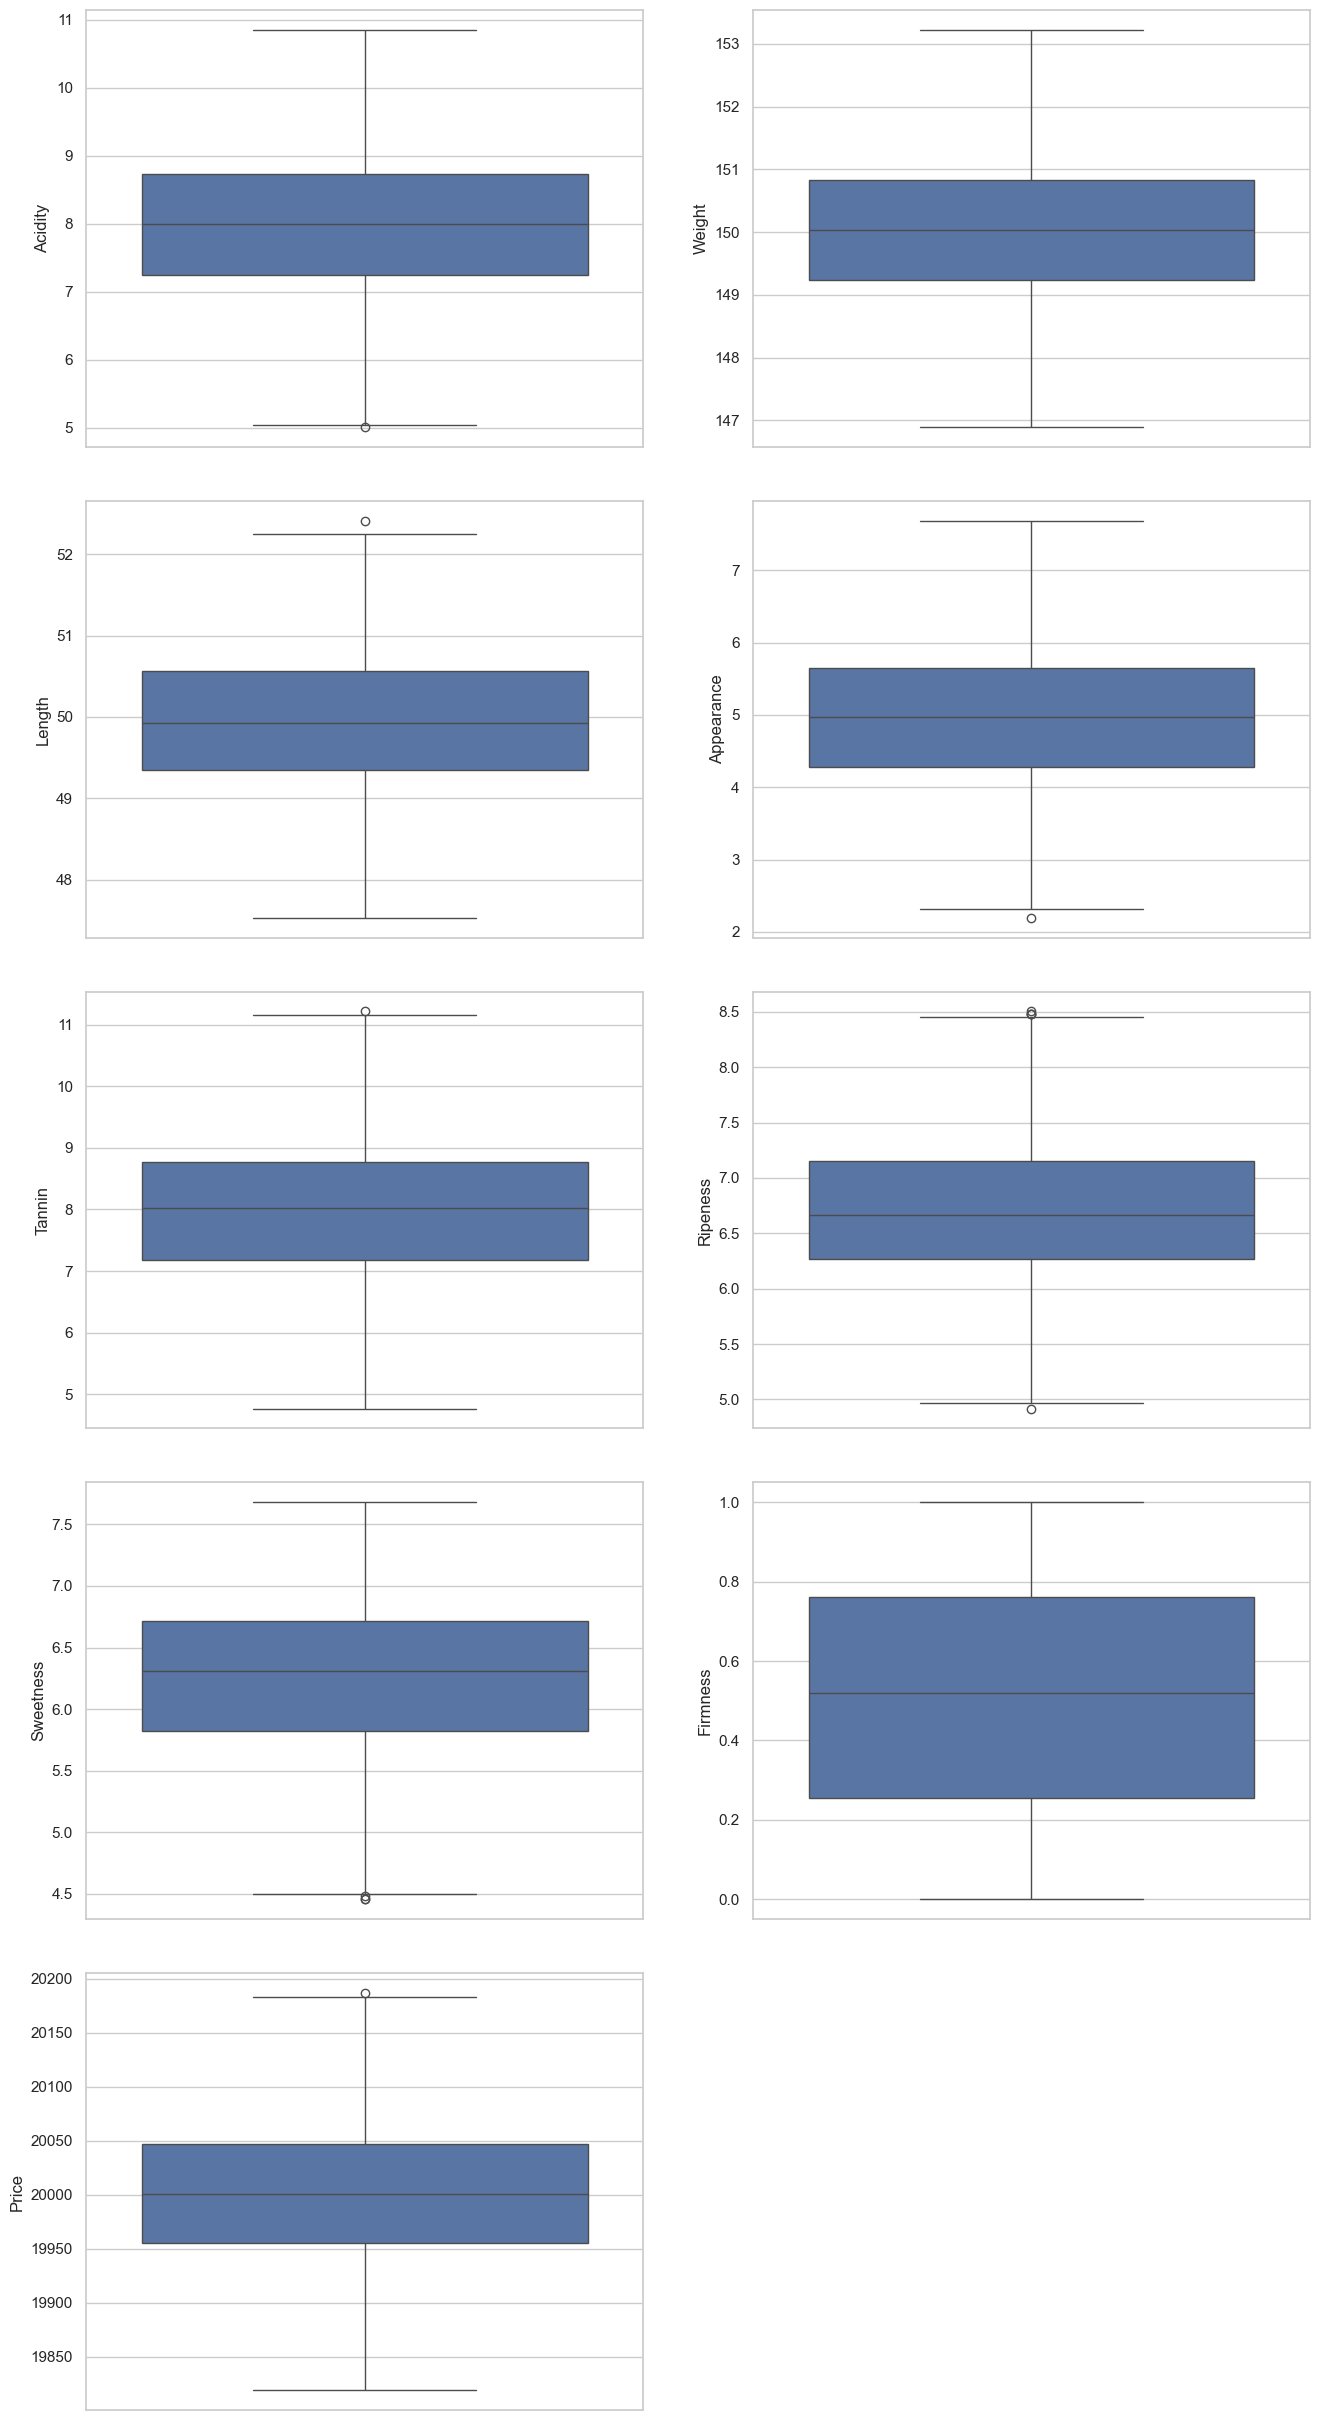

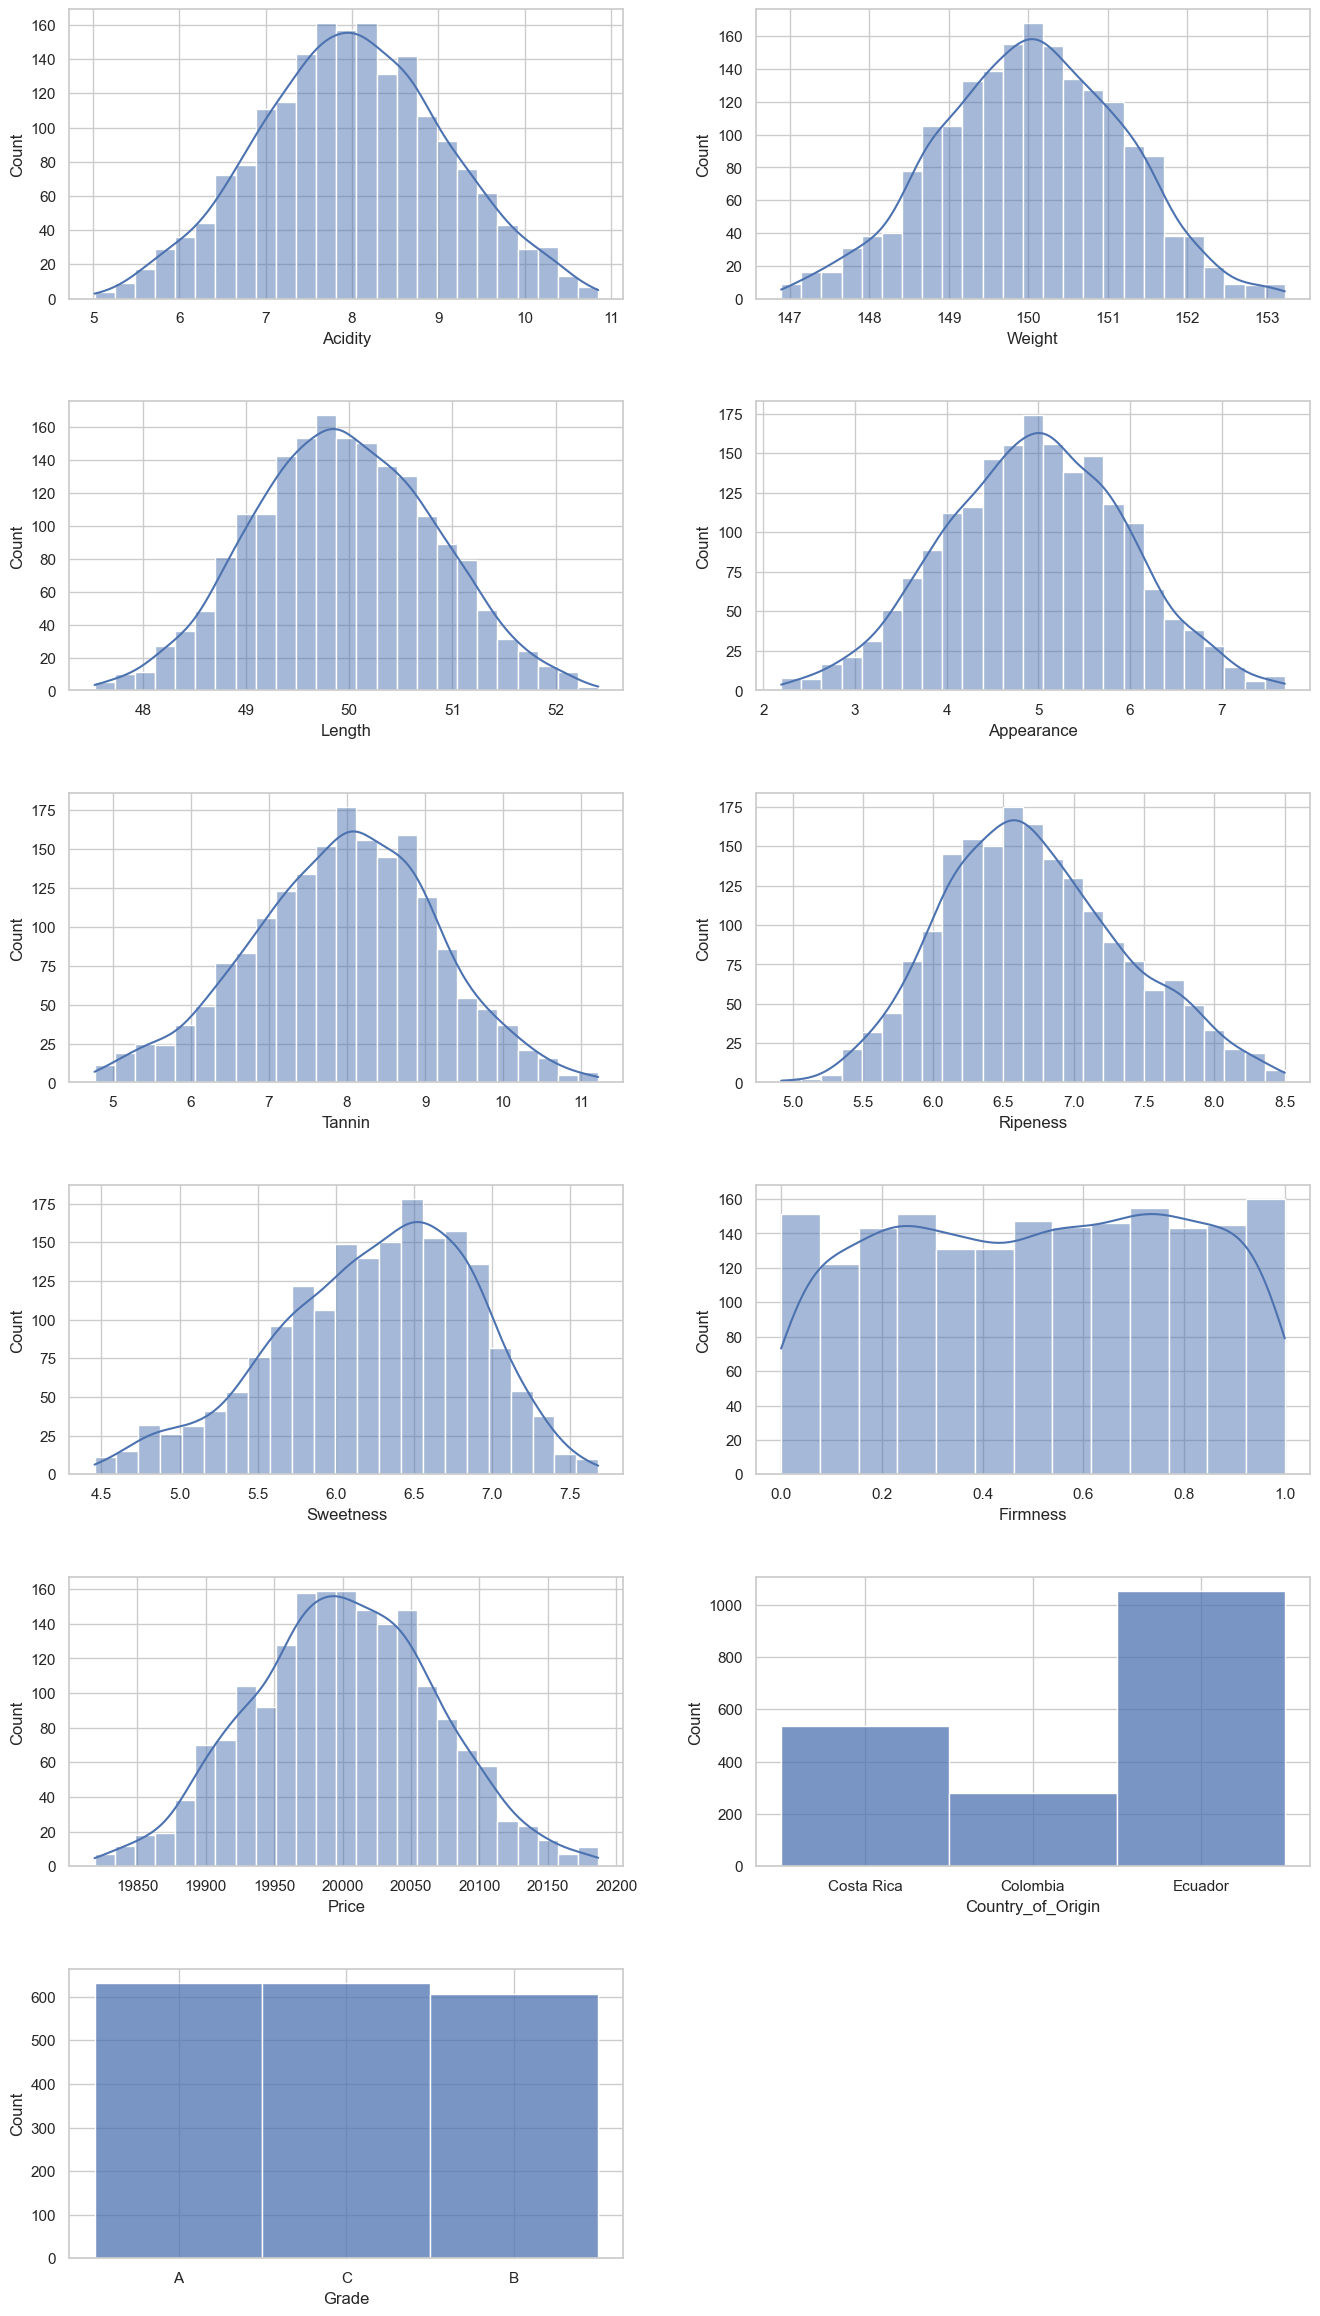

In [8]:
sns.set_theme(style="whitegrid")

numeric_columns = ['Acidity', 'Weight', 'Length', 'Appearance', 'Tannin', 'Ripeness', 'Sweetness', 'Firmness', 'Price']

categorical_columns = ['Country_of_Origin', 'Grade']

fig, axes = plt.subplots(5, 2, figsize=(14, 25))

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i//2, i%2])

for i in range(len(numeric_columns), 10):
    axes[i//2, i%2].axis('off')

fig.tight_layout(pad=3.0)
plt.show()

fig, axes = plt.subplots(6, 2, figsize=(14, 24))
for i, col in enumerate(numeric_columns + categorical_columns):
    if col in numeric_columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i//2, i%2])
    else:
        sns.histplot(data=df, x=col, ax=axes[i//2, i%2], discrete=True)

if len(numeric_columns + categorical_columns) % 2 != 0:
    axes[-1, -1].axis('off')

fig.tight_layout(pad=3.0)
plt.show()

### SOAL 4

In [9]:
# Analisis Berdasarkan Statistik dan Visualisasi
print("Menentukan distribusi setiap kolom numerik\n")
# Acidity
# Skewness: 0.012891 (sangat dekat dengan 0, menunjukkan distribusi yang hampir simetris)
# Kurtosis: -0.326980 (sedikit lebih datar daripada distribusi normal)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Acidity: Terdistribusi hampir normal")

# Weight
# Skewness: -0.053375 (hampir simetris)
# Kurtosis: -0.258359 (sedikit lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Weight: Terdistribusi hampir normal")


# Length
# Skewness: 0.036229 (hampir simetris)
# Kurtosis: -0.335011 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Length: Terdistribusi hampir normal")

# Appearance
# Skewness: -0.021565 (sangat simetris)
# Kurtosis: -0.236897 (sedikit lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Appearance: Terdistribusi hampir normal")

# Tannin
# Skewness: -0.131216 (sedikit skewness negatif)
# Kurtosis: -0.178181 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Tannin: Terdistribusi hampir normal")

# Ripeness
# Skewness: 0.308069 (sedikit skewness positif)
# Kurtosis: -0.315081 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak sedikit ke kiri dari tengah
# Kesimpulan: Terdistribusi hampir normal
print("Ripeness: Terdistribusi hampir normal")

# Sweetness
# Skewness: -0.429043 (sedikit skewness negatif)
# Kurtosis: -0.262934 (lebih datar)
# Visual: Mengikuti kurva simetris dengan puncak sedikit ke kanan dari tengah
# Kesimpulan: Terdistribusi hampir normal
print("Sweetness: Terdistribusi hampir normal")

# Firmness
# Skewness: -0.043285 (hampir simetris)
# Kurtosis: -1.204085 (lebih datar dan berkemungkinan distribusi uniform)
# Visual: Tidak membentuk puncak, hampir lurus secara horizontal
# Kesimpulan: Distribusi lebih dekat ke uniform daripada normal.
print("Firmness: Terdistribusi uniform")

# Price:
# Skewness: 0.014543 (sangat dekat dengan 0)
# Kurtosis: -0.256620 (lebih datar)
# Visual: Mengikuti kurva simetris dengna puncak di tengah
# Kesimpulan: Terdistribusi hampir normal.
print("Price: Terdistribusi hampir normal")

Menentukan distribusi setiap kolom numerik

Acidity: Terdistribusi hampir normal
Weight: Terdistribusi hampir normal
Length: Terdistribusi hampir normal
Appearance: Terdistribusi hampir normal
Tannin: Terdistribusi hampir normal
Ripeness: Terdistribusi hampir normal
Sweetness: Terdistribusi hampir normal
Firmness: Terdistribusi uniform
Price: Terdistribusi hampir normal


### SOAL 5

In [10]:
# UJI SAMPEL 1 TAIL

# LANGKAH-LANGKAH:
# 1. Tentukan H0: θ = data
# 2. Tentukan H1: θ > data atau θ < data
# 3. Tentukan α: α = 0.05
# 4. Tentukan uji stastik dan daerah kritis: uji statistik dan daerah kritis tergantung soal
# 5. Hitung nilai uji dan p_value
# 6. Ambil keputusan tolak atau tidak tolak

# Memakai fungsi uji z bukan uji t

# Fungsi untuk Uji z satu sampel dan perhitungan nilai p
def z_test(sample, data, alpha, alternative='two-sided'):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=0)
    n = len(sample)
    z_stat = (sample_mean - data) / (sample_std / np.sqrt(n))

    if alternative == 'greater':
        p_value = 1 - norm.cdf(z_stat)
        critical_value = norm.ppf(1 - alpha)
        reject_null = z_stat > critical_value
    elif alternative == 'less':
        p_value = norm.cdf(z_stat)
        critical_value = norm.ppf(alpha)
        reject_null = z_stat < critical_value
    else:
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))
        critical_value = norm.ppf(1 - alpha / 2)
        reject_null = abs(z_stat) > critical_value

    return z_stat, p_value, critical_value, reject_null

# Fungsi untuk Uji t satu sampel dan perhitungan nilai p
def t_test(sample, data, alpha, alternative='two-sided'):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1) 
    n = len(sample)
    t_stat = (sample_mean - data) / (sample_std / np.sqrt(n))
    df = n - 1

    if alternative == 'greater':
        p_value = 1 - t.cdf(t_stat, df)
        critical_value = t.ppf(1 - alpha, df)
        reject_null = t_stat > critical_value
    elif alternative == 'less':
        p_value = t.cdf(t_stat, df)
        critical_value = t.ppf(alpha, df)
        reject_null = t_stat < critical_value
    else:
        p_value = 2 * (1 - t.cdf(abs(t_stat), df))
        critical_value = t.ppf(1 - alpha / 2, df)
        reject_null = abs(t_stat) > critical_value

    return t_stat, p_value, critical_value, reject_null

# def binomial_prob(k, n, p):
#     """ Menghitung probabilitas binomial untuk k sukses dalam n percobaan dengan probabilitas sukses p """
#     comb = math.comb(n, k)  # Menggunakan math.comb untuk menghitung kombinasi
#     return comb * (p ** k) * ((1 - p) ** (n - k))

# def manual_binomial_test(successes, trials, prop_null, alpha=0.05, alternative='two-sided'):
#     p_value = 0
#     if alternative == 'two-sided':
#         # Menghitung p-value dua sisi
#         for k in range(trials + 1):
#             if binomial_prob(k, trials, prop_null) <= binomial_prob(successes, trials, prop_null):
#                 p_value += binomial_prob(k, trials, prop_null)
#         p_value *= 2  # Dikali dua karena dua sisi
#     elif alternative == 'greater':
#         # Menghitung p-value untuk keberhasilan lebih besar
#         for k in range(successes, trials + 1):
#             p_value += binomial_prob(k, trials, prop_null)
#     elif alternative == 'less':
#         # Menghitung p-value untuk keberhasilan lebih kecil
#         for k in range(successes + 1):
#             p_value += binomial_prob(k, trials, prop_null)
    
#     # Menyesuaikan p-value jika melebihi 1
#     p_value = min(p_value, 1.0)
    
#     # Menentukan apakah menolak hipotesis nol
#     reject_null = p_value < alpha

#     return p_value, reject_null

In [11]:
acidity = df['Acidity']
z_stat_acidity, p_value_acidity, critical_value_acidity, reject_acidity = z_test(acidity, 6, alpha=0.05, alternative='greater')
print(f"Uji z untuk Acidity: z-statistik = {z_stat_acidity}, p-value = {p_value_acidity}, z-kritis = {critical_value_acidity}, Tolak H0: {reject_acidity}")

Uji z untuk Acidity: z-statistik = 79.6486973418006, p-value = 0.0, z-kritis = 1.6448536269514722, Tolak H0: True


In [12]:
weight = df['Weight']
z_stat_weight, p_value_weight, critical_value_weight, reject_weight = z_test(weight, 150, alpha=0.05, alternative='two-sided')
print(f"Uji z untuk Weight: z-statistik = {z_stat_weight}, p-value = {p_value_weight}, z-kritis = {critical_value_weight}, Tolak H0: {reject_weight}")

Uji z untuk Weight: z-statistik = 0.8394293115698445, p-value = 0.40122844114964207, z-kritis = 1.959963984540054, Tolak H0: False


In [13]:
# length_last_10 = df['Length'].tail(10)
# z_stat_length, p_value_length, critical_value_length, reject_length = z_test(length_last_10, 49, alpha=0.05, alternative='two-sided')
# print(f"Uji z untuk Length 10 baris terakhir: z-statistik = {z_stat_length}, p-value = {p_value_length}, z-kritis = {critical_value_length}, Tolak H0: {reject_length}")

length_last_10 = df['Length'].tail(10)
t_stat_length, p_value_length, critical_value_length, reject_length = t_test(length_last_10, 49, alpha=0.05, alternative='two-sided')
print(f"Uji t untuk Length 10 baris terakhir: t-statistik = {t_stat_length}, p-value = {p_value_length}, t-kritis = {critical_value_length}, Tolak H0: {reject_length}")

Uji t untuk Length 10 baris terakhir: t-statistik = 1.2862564266596896, p-value = 0.230455729470894, t-kritis = 2.2621571628540993, Tolak H0: False


In [14]:
tannin = df['Tannin']
n = len(tannin)
prop_hat = sum(tannin > 8) / n
p0 = 0.55
z_stat_tannin = (prop_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)
p_value_tannin = 2 * (1 - norm.cdf(abs(z_stat_tannin)))
z_critical = norm.ppf(1 - 0.05 / 2)
reject_tannin = abs(z_stat_tannin) > z_critical

print(f"Uji proporsi untuk Tannin: z-statistik = {z_stat_tannin}, p-value = {p_value_tannin}, z-kritis = {z_critical}, Tolak H0: {reject_tannin}")


# successes = np.sum(df['Tannin'] > 8)
# trials = len(df['Tannin'])

# # Proporsi di bawah hipotesis nol
# prop_null = 0.55

# # Melakukan uji binomial
# p_value, reject_null = manual_binomial_test(successes, trials, prop_null, alpha=0.05, alternative='two-sided')

# print(f"P-value: {p_value}")
# print(f"Reject H0: {reject_null}")

Uji proporsi untuk Tannin: z-statistik = -3.8567735319758265, p-value = 0.00011489351708449114, z-kritis = 1.959963984540054, Tolak H0: True
